<a href="https://colab.research.google.com/github/nataliyah123/ibia-Ersilia/blob/main/ersiliadili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -r lazy-qsar/

rm: cannot remove 'lazy-qsar/': No such file or directory


In [ ]:
%%capture

!pip install rdkit-pypi

In [ ]:
%%capture
!git clone https://github.com/ersilia-os/lazy-qsar.git
%cd lazy-qsar
!python -m pip install -e .

In [ ]:
%%capture
!pip install git+https://github.com/samoturk/mol2vec

In [ ]:
import lazyqsar as lq
import pandas as pd
import numpy as np
from rdkit import Chem
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from gensim.models import word2vec
from sklearn.model_selection import cross_val_score

In [ ]:
# smiles = Chem.SmilesMolSupplier('dili.smi',delimiter='\n') failed 
smilescsv = pd.read_csv('dilismiles.csv', names = ['col_smiles'])
smileslist = smilescsv['col_smiles'].tolist()

Add the H mol forgot to #ibia

In [ ]:
data = pd.read_csv('dili_padel_2d.csv')
dataframe = pd.DataFrame(data)
dataframe.head()

Columns (423,424,425,426,427,428,429,430,431,477,478,479,480,481,482,483,484,485,540,541,542,543,544,545,546,547,548,603,604,605,606,607,608,609,610,611,1012,1013,1050,1052,1074,1083,1084,1121,1123,1145,1217,1218,1219,1220,1222,1223,1224,1226,1227,1229) have mixed types.Specify dtype option on import or set low_memory=False.


,ID,CommonName,Outcome,nAcid,naAromAtom,nAromBond,nB,nN,nO,nS,...,AMW,WTPT1,WTPT2,WTPT3,WTPT4,WTPT5,WPATH,WPOL,XLogP,Zagreb
0,AUTOGEN_dili_1,Aurothioglucose,1,0,0,0,0,0,5,1,...,8.479683,23.078977,1.923248,15.422349,12.919448,0.000000,182,19,-1.807,58
1,AUTOGEN_dili_2,DemecariumBromide,1,0,12,12,0,4,4,0,...,6.047814,78.841924,1.971048,24.051089,11.127775,12.923314,8054,55,7.024,194
2,AUTOGEN_dili_3,Dextromethorphan,0,0,6,6,0,1,1,0,...,6.026525,42.041518,2.102076,6.134966,2.806398,3.328569,682,41,4.207,116
3,AUTOGEN_dili_4,Ergotamine,0,0,15,16,0,5,5,0,...,7.452100,90.264234,2.099168,30.004012,13.475249,16.528762,6191,88,3.848,258
4,AUTOGEN_dili_5,Beclomethasone,0,0,0,0,0,0,5,0,...,7.160883,56.562478,2.020089,15.115392,12.515759,0.000000,1670,70,1.275,168


check for duplicate values in the dataframe. I removed the code, have to do it again.

In [ ]:
drop_outcome = dataframe.drop(["Outcome"], axis = 1)
duplicate = drop_outcome[drop_outcome.duplicated()]
duplicate
# drop_outcome no duplicates with all descriptors
# check duplicate smiles
print("Length of list:%d\nlength of set:%d\n" %(len(smileslist), len(set(smileslist))))
print("dataframe duplicates", duplicate)

Length of list:588
length of set:587

dataframe duplicates Empty DataFrame
Columns: [ID, CommonName, nAcid, naAromAtom, nAromBond, nB, nN, nO, nS, nP, nF, nCl, nBr, nI, nX, nBase, nBondsD, nBondsD2, nBondsT, nBondsQ, C1SP1, C2SP1, C1SP2, C2SP2, C3SP2, C1SP3, C2SP3, C3SP3, C4SP3, nHBd, nwHBd, nHBint2, nHBint3, nHBint4, nHBint5, nHBint6, nHBint7, nHBint9, nHBint10, nHsOH, nHdNH, nHsSH, nHsNH2, nHssNH, nHaaNH, nHsNH3p, nHssNH2p, nHsssNHp, nHtCH, nHdCH2, nHdsCH, nHaaCH, nHCHnX, nHCsatu, nHAvin, nHother, nHmisc, nsLi, nssBe, nssssBem, nsBH2, nssBH, nsssB, nssssBm, nsCH3, ndCH2, nssCH2, ntCH, ndsCH, naaCH, nsssCH, nddC, ntsC, ndssC, naasC, naaaC, nssssC, nsNH3p, nsNH2, nssNH2p, ndNH, nssNH, naaNH, ntN, nsssNHp, ndsN, naaN, nsssN, nddsN, naasN, nssssNp, nsOH, ndO, nssO, naaO, naOm, nsOm, nsF, nsSiH3, nssSiH2, ...]
Index: []

[0 rows x 1446 columns]


In [ ]:
setOfElems = set()
for elem in smileslist:
        if elem in setOfElems:
            print("duplicate smile in smile csv",elem)
        else:
            setOfElems.add(elem)  

OC(=O)c1cccnc1


In [ ]:
y = dataframe['Outcome']
# y['target']= dataframe.iloc[:,2]
print('shape and type', y.shape, type(y))

shape and type (588,) <class 'pandas.core.series.Series'>


# Word to Vector



*    load a pre-trained mol2vec model. It's trained with radius=1 for Morgan fingerprints to yield 300 dimensional embeddings




In [ ]:
model = word2vec.Word2Vec.load('../model_300dim_eric.pkl')

In [ ]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence,DfVec, sentences2vec
import numpy as np

In [ ]:
smilescsv['mol'] = smilescsv['col_smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 




*   mol2alt_sentence() constructs a so-called 'molecular sentence' with desired Morgan fingerprints' radius (uses RDkit backend) where 'words' are unique substructure identifiers; MolSentence() is an internal wrapper function; 

*   sentences2vec() generates molecular embeddings with the help of the trained model; DfVec() is an internal wrapper for embeddings' generator (attribute .vec yields aggregated vectors).




In [ ]:
smilescsv['sentence'] = smilescsv.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
smilescsv['mol2vec'] = [DfVec(x) for x in sentences2vec(smilescsv['sentence'], model, unseen='UNK')]

In [ ]:
#the shape of the X must have 300 rather than 100 because the model is 300 dimensions??
# X = np.array([x.vec for x in smilescsv['mol2vec']])
# del X
X = np.array([x.vec for x in smilescsv['mol2vec']])

print('shape and type',X.shape, type(X), X)

shape and type (588, 300) <class 'numpy.ndarray'> [[  1.5785058   -4.2252035   -3.6844869  ...  -3.6743457   -9.272826
    2.1444242 ]
 [  4.622829    -4.915413    -6.346806   ... -13.368401   -17.19497
   -3.2710881 ]
 [  0.6792828   -3.096483    -0.46020362 ...  -2.7240472   -9.070516
    0.19057192]
 ...
 [  3.7899497   -3.7518232   -0.91790193 ...  -8.731583   -13.732884
   -4.6143656 ]
 [ -2.8500965    1.8607624    1.4684141  ...  -2.2298014   -4.41306
   -6.536581  ]
 [ -3.0465262   -0.1431011   -1.0731335  ... -16.938929   -19.690495
   -6.5446453 ]]


In [ ]:
checkX= pd.DataFrame(X)
checkX.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-4.845266,2.342194,-2.365556,-2.712993,-4.856701,-2.352966,0.278307,-4.341275,6.405187,-3.304002,...,6.299218,1.387789,-3.142272,-11.094283,13.716575,-7.537609,0.644480,-0.973483,-14.757071,3.395199
1,0.005262,3.893001,-13.113170,-0.800969,-4.134776,-14.333963,-19.066595,-18.694887,-12.683990,-20.209694,...,34.971222,13.848557,6.648724,-37.087585,21.440086,-31.448326,9.109692,20.049501,-21.226118,-11.819835
2,-1.032504,2.843993,-0.792036,-8.111418,-7.473220,-5.398043,-7.469626,-10.879922,-2.835202,-3.248640,...,16.322193,0.372131,-6.487584,-12.283837,11.356331,-16.771866,6.005531,11.109912,-8.625827,0.519091
3,2.475980,4.848641,-2.299567,-12.915607,-18.538816,-14.016421,-13.259410,-15.377983,-6.439005,-5.219620,...,29.750200,4.826057,-11.601947,-26.687702,22.835144,-37.689392,13.851109,22.583904,-24.776945,-5.541135
4,-14.565528,13.046351,-9.077509,-18.810884,-8.828866,-10.246983,-8.309449,-5.161047,3.537268,-4.689940,...,28.473900,-0.357428,-10.854393,-22.084314,26.352062,-21.327965,17.122334,3.933175,-23.742367,0.496415


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
y_train.size
# len(x_train)
# x_train

array([[  8.305094  ,   1.1954285 ,  -2.4597409 , ...,  11.172375  ,
        -25.481987  ,  -3.1788335 ],
       [-12.357057  ,   9.686745  , -10.118664  , ...,   2.3198795 ,
        -24.71598   ,   2.3880022 ],
       [  0.5532492 ,  -0.19428855,  -0.72879493, ...,  18.069597  ,
         -7.413022  ,  -5.2563114 ],
       ...,
       [ -1.6007338 ,  -0.44501156,  -2.3017435 , ...,   2.627388  ,
         -2.495544  ,  -2.1560957 ],
       [  1.5146053 ,  -1.4057201 ,  -0.29111087, ...,  10.484504  ,
         -8.069651  ,  -1.6734446 ],
       [  6.327439  ,  -0.401002  ,  -0.26561865, ...,  13.180579  ,
        -12.863239  ,  -3.7406812 ]], dtype=float32)

In [ ]:
# automl = false
print("AUROC", auc(fprmd, tprmd))

AUROC 0.5905797101449276


classification using random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_score(rfclf, X, y, cv=10)

array([0.69491525, 0.74576271, 0.66101695, 0.6779661 , 0.66101695,
       0.66101695, 0.69491525, 0.66101695, 0.67241379, 0.68965517])

In [ ]:
#performance on train set
rfclf.fit(X,y)
rf_hat = rfclf.predict()

classification using SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svcmodel = SVC(kernel='linear')
svcmodel.fit(x_train, y_train)
y_hat = svcmodel.predict(x_test)

In [ ]:
fprmd, tprmd, _ = roc_curve(y_test, y_hat,  pos_label = 1)
print('area under the curve',auc(fprmd, tprmd))
cross_val_score(svcmodel, X, y, cv=10)

area under the curve 0.524671052631579


array([0.59322034, 0.71186441, 0.6440678 , 0.66101695, 0.69491525,
       0.59322034, 0.59322034, 0.61016949, 0.68965517, 0.62068966])

classification using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state=0).fit(x_train, y_train)
# y_hat_lr = clf.predict(x_test)
# fprmdlr, tprmdlr, th = roc_curve(y_test, y_hat,  pos_label = 1)

# print(auc(fprmdlr, tprmdlr))
clflrcv = LogisticRegression(random_state=0)
cross_val_score(clflrcv, X, y, cv=10)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

array([0.61016949, 0.6440678 , 0.76271186, 0.6779661 , 0.69491525,
       0.55932203, 0.61016949, 0.57627119, 0.55172414, 0.56896552])

classification using decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
cross_val_score(dtc, X, y, cv=10)

array([0.54237288, 0.62711864, 0.66101695, 0.55932203, 0.6440678 ,
       0.61016949, 0.62711864, 0.57627119, 0.62068966, 0.63793103])

In [ ]:
# testing with sklearn ridgeCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_test = np.array(x_test)
ridge = RidgeCV(cv=5)
ridge.fit(x_train, y_train)
prediction = ridge.predict(x_test)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
print("mae, mse", mae,mse)

mae, mse 0.37382467469926606 0.20673773856916644


In [ ]:
model = lq. MorganBinaryClassifier()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_hat)
print("AUROC", auc(fpr, tpr))

[flaml.automl: 11-16 15:55:33] {2365} INFO - task = classification
INFO:flaml.automl:task = classification
[flaml.automl: 11-16 15:55:33] {2367} INFO - Data split method: stratified
INFO:flaml.automl:Data split method: stratified
[flaml.automl: 11-16 15:55:33] {2371} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 11-16 15:55:33] {2448} INFO - Minimizing error metric: 1-roc_auc
INFO:flaml.automl:Minimizing error metric: 1-roc_auc
[flaml.automl: 11-16 15:55:33] {2561} INFO - List of ML learners in AutoML Run: ['rf']
INFO:flaml.automl:List of ML learners in AutoML Run: ['rf']
[flaml.automl: 11-16 15:55:33] {2853} INFO - iteration 0, current learner rf
INFO:flaml.automl:iteration 0, current learner rf
[flaml.automl: 11-16 15:55:34] {2984} INFO - Estimated sufficient time budget=3246s. Estimated necessary time budget=3s.
INFO:flaml.automl:Estimated sufficient time budget=3246s. Estimated necessary time budget=3s.
[flaml.automl: 11-16 15:55:34] 

AUROC 0.5039251207729468


In [ ]:
# ClassicBinaryClassifier
model = lq.ClassicBinaryClassifier(automl=False)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
fprcb, tprcb, _ = roc_curve(y_test, y_hat)
print("AUROC", auc(fprcb, tprcb))

AUROC 0.6222826086956521


In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test,y_hat).ravel()
tn, fp, fn, tp

(18, 28, 8, 64)

In [ ]:
y_test_list = y_test.tolist()
print(y_test_list.count(0), y_test_list.count(1))
n0 = y_test_list.count(0)
n1 = y_test_list.count(1)

46 72


In [ ]:
# corrected classification rate
ccr = (0.5)*((tn / n0 ) + (tp / n1))
ccr

0.6400966183574879

In [ ]:
model = lq.MordredBinaryClassifier()

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
     
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
%%capture
!pip install scikeras

from scikeras.wrappers import KerasClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# decision_tree_model = DecisionTreeClassifier(criterion="entropy",
#                                      random_state=0)
#keras_clf = KerasClassifier(model = model, optimizer="adam", epochs=100, verbose=0)
modred_result = cross_validation(model,smileslist,y, 5)
print(modred_result)

{'Training Accuracy scores': array([nan, nan, nan, nan, nan]), 'Mean Training Accuracy': nan, 'Training Precision scores': array([nan, nan, nan, nan, nan]), 'Mean Training Precision': nan, 'Training Recall scores': array([nan, nan, nan, nan, nan]), 'Mean Training Recall': nan, 'Training F1 scores': array([nan, nan, nan, nan, nan]), 'Mean Training F1 Score': nan, 'Validation Accuracy scores': array([nan, nan, nan, nan, nan]), 'Mean Validation Accuracy': nan, 'Validation Precision scores': array([nan, nan, nan, nan, nan]), 'Mean Validation Precision': nan, 'Validation Recall scores': array([nan, nan, nan, nan, nan]), 'Mean Validation Recall': nan, 'Validation F1 scores': array([nan, nan, nan, nan, nan]), 'Mean Validation F1 Score': nan}



5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 578, in _validate_data
    X = check_array(X, **check_X_params)
  File "/usr

Evaluating the model

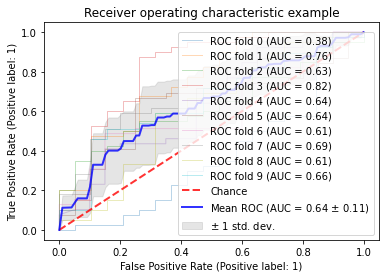

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()